# Using architecture of an existing model and retraining it

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from Definitions import *

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [3]:
print(f"Shape of the images in the training dataset: {train_images[0].shape}")

Shape of the images in the training dataset: (28, 28)


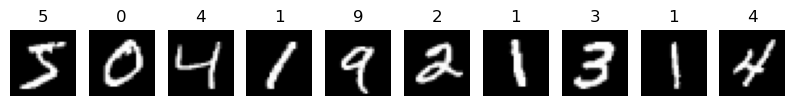

In [4]:
fig, axes  = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
    axes[i].imshow(train_images[i].reshape(28,28), cmap='gray')
    axes[i].set_title(train_labels[i])
    axes[i].axis('off')
plt.show()

In [5]:
model = load_model('model_relu_128_64.h5')

I would like to reset the weights and biases in this model so that the previous training does not affect it

In [6]:
train_images[0].shape

(28, 28)

In [11]:
model.set_weights([tf.random.normal(w.shape) for w in model.get_weights()])

In [12]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [13]:
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 61.1531 - accuracy: 0.7180 - val_loss: 16.4495 - val_accuracy: 0.8581
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 12.1869 - accuracy: 0.8713 - val_loss: 9.6663 - val_accuracy: 0.8880
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.9441 - accuracy: 0.9017 - val_loss: 6.4542 - val_accuracy: 0.9093
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 4.5721 - accuracy: 0.9211 - val_loss: 4.8967 - val_accuracy: 0.9216
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 3.1428 - accuracy: 0.9338 - val_loss: 4.2813 - val_accuracy: 0.9271
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2910 - accuracy: 0.9437 - val_loss: 3.7797 - val_accuracy: 0.9254
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6919 - accuracy: 0.9514 - val_loss: 3.1278 - val_accura

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Accuracy of the neural network on the {test_images.shape[0]} test images: {test_accuracy*100:.2f}%')

313/313 [==============================] - 0s 820us/step - loss: 2.6606 - accuracy: 0.9378
Accuracy of the neural network on the 10000 test images: 93.78%


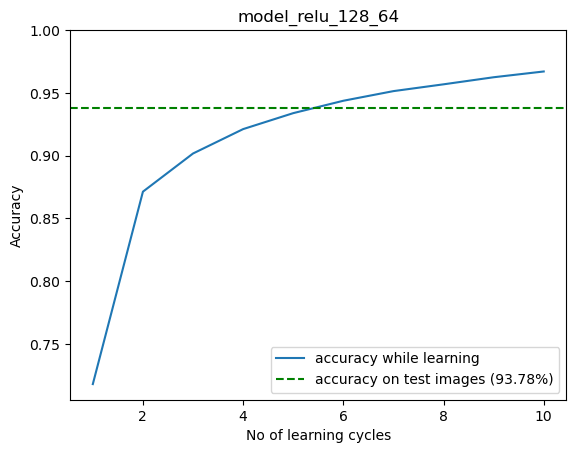

In [16]:
plot_learning_curve(history, test_accuracy, model.name)